In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
Cust = pd.read_csv(r'C:\Users\Sughu\Downloads\Python Foundation Case Study 2 - Credit Card Case Study\Customer Acqusition.csv')

In [5]:
repayment = pd.read_csv(r'C:\Users\Sughu\Downloads\Python Foundation Case Study 2 - Credit Card Case Study\Repayment.csv')

In [6]:
spend = pd.read_csv(r'C:\Users\Sughu\Downloads\Python Foundation Case Study 2 - Credit Card Case Study\spend.csv')

In [7]:
credit_card_data = pd.read_excel(r'C:\Users\Sughu\Downloads\Python Foundation Case Study 2 - Credit Card Case Study\Credit Card Data.xlsx')

In [8]:
# Understanding the data
Cust.head(100)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [9]:
#method 1
#Cust['Product'] = np.where(Cust['Product']=='Platimum','Platinum',Cust['Product'])

In [10]:
#method 2
Cust['Product'] = Cust['Product'].replace(['Platimum'],'Platinum')

In [11]:
repayment.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [12]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [13]:
credit_card_data.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed
1,2,A2,50.497350,CALCUTTA,Silver,100000,C2,Salaried_MNC
2,3,A3,35.855817,COCHIN,Platimum,10000,C3,Salaried_Pvt
3,4,A4,27.356821,BOMBAY,Platimum,10001,C4,Govt
4,5,A5,22.021249,BANGALORE,Platimum,10002,C5,Normal Salary


In [14]:
Cust.dtypes

No            int64
Customer     object
Age           int64
City         object
Product      object
Limit       float64
Company      object
Segment      object
dtype: object

In [15]:
repayment.dtypes

SL No:        float64
Customer       object
Month          object
Amount        float64
Unnamed: 4    float64
dtype: object

In [16]:
# changing the data types to proper format
repayment['Month'] = pd.to_datetime(repayment.Month)

In [17]:
spend.dtypes

Sl No:        int64
Customer     object
Month        object
Type         object
Amount      float64
dtype: object

In [18]:
spend['Month'] = pd.to_datetime(spend.Month)

In [19]:
Cust.isnull().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [20]:
repayment.isnull().sum()

SL No:          24
Customer        23
Month           23
Amount          23
Unnamed: 4    1523
dtype: int64

In [21]:
repayment = repayment.loc[:,['Customer','Month','Amount']]

In [22]:
repayment = repayment.dropna()

In [23]:
repayment.isnull().sum()

Customer    0
Month       0
Amount      0
dtype: int64

In [24]:
spend.isnull().sum()

Sl No:      0
Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [25]:
#1(a) In case age is less than 18, replace it with mean of age values
Cust.Age.mean()

46.49

In [26]:
#method 1
Cust['Age'] = np.where(Cust['Age']<18,Cust.Age.mean(),Cust['Age'])

In [27]:
#method 2
#Cust.loc[Cust['Age']<18,'Age'] = Cust['Age'].mean()

In [28]:
Cust.shape

(100, 8)

In [29]:
spend.shape

(1500, 5)

In [30]:
#(b)  In case spend amount is more than the limit, replace it with 50% of that customer’s limit
cust_spend = pd.merge(left=Cust,right=spend,left_on='Customer',right_on='Customer',how='inner')

In [31]:
cust_spend.isna().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
Sl No:      0
Month       0
Type        0
Amount      0
dtype: int64

In [32]:
cust_spend.loc[cust_spend['Amount']>cust_spend['Limit'],'Amount'] = cust_spend['Limit']*0.5

In [33]:
cust_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66
1496,97,A97,58.0,TRIVANDRUM,Platinum,10000.0,C20,Govt,99,2004-01-12,AUTO,5000.00
1497,98,A98,51.0,CALCUTTA,Platinum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,5000.50
1498,99,A99,35.0,CALCUTTA,Platinum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,5001.00


In [34]:
#(c) Incase the repayment amount is more than the limit, replace the repayment with the limit

cust_repayment = pd.merge(left=Cust,right=repayment,left_on='Customer',right_on='Customer',how='inner')

In [35]:
cust_repayment.loc[cust_repayment['Amount']>cust_repayment['Limit'],'Amount'] = cust_repayment['Limit']

In [36]:
cust_repayment

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,100000.00
1496,97,A97,58.0,TRIVANDRUM,Platinum,10000.0,C20,Govt,2004-01-12,10000.00
1497,98,A98,51.0,CALCUTTA,Platinum,10001.0,C21,Normal Salary,2004-01-03,10001.00
1498,99,A99,35.0,CALCUTTA,Platinum,10002.0,C22,Self Employed,2004-01-15,10002.00


In [37]:
#2 Summary
#(a) distinct customers
Cust['Customer'].nunique()

100

In [38]:
#(b) distinct categories
Cust['Segment'].nunique()

5

In [39]:
cust_spend['only_month'] = cust_spend['Month'].dt.month

In [40]:
cust_spend['year'] = cust_spend['Month'].dt.year

In [41]:
cust_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,only_month,year
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,1,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,1,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,1,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,1,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,1,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66,1,2004
1496,97,A97,58.0,TRIVANDRUM,Platinum,10000.0,C20,Govt,99,2004-01-12,AUTO,5000.00,1,2004
1497,98,A98,51.0,CALCUTTA,Platinum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,5000.50,1,2004
1498,99,A99,35.0,CALCUTTA,Platinum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,5001.00,1,2004


In [84]:
#(c) average monthly spend by customers
round(cust_spend[['only_month','year','Amount']].groupby(['year','only_month']).mean(),2)

Amount
year only_month           
2004 1           144233.92
     2           136998.28
     3           133708.09
     4           124621.98
     5           153326.95
     9           171579.26
     11           79642.08
2005 1           192271.67
     2           154334.42
     4           146430.92
     5           154625.80
     6           190726.48
     7           120803.09
     8           141707.44
     9           109423.78
     10           89879.42
     11          178120.21
     12           84416.00
2006 1           136312.52
     2           148478.99
     3           131720.29
     4           134743.70
     5           143693.69
     6           155971.50
     7           189088.68
     8           213863.92
     9           142392.07
     10          172156.29
     11          144283.95
     12          150129.36

In [43]:
cust_repayment['only_month'] = cust_repayment['Month'].dt.month

In [44]:
cust_repayment['year'] = cust_repayment['Month'].dt.year

In [45]:
#(d) average monthly repayment by customers
cust_repayment[['only_month','year','Amount']].groupby(['year','only_month']).mean()

Amount
year only_month               
2004 1           159971.502571
     2           125612.505556
     3           177767.948000
     4           175632.658000
     5           151310.396400
     9           118926.025625
     11          119226.575333
2005 1           181260.750000
     2           157356.791358
     4           121163.452000
     5           200121.848636
     6            97052.375833
     7           149944.928333
     8           149984.104865
     9            73559.961667
     10          136268.268333
     11          169225.884048
     12          179119.050833
2006 1           204422.038333
     2           188198.167436
     3           154861.950196
     4           180529.321556
     5           171270.320230
     6           165429.070000
     7           170152.780811
     8           161553.497500
     9           199024.565833
     10          203969.589167
     11          145565.170370
     12          201158.939167

In [46]:
#(e) If the monthly rate of interest is 2.9%, what is the profit for the bank for each month
cust_spend_repayment = pd.merge(left=cust_spend,right=repayment,left_on='Customer',right_on='Customer',how='inner')

In [47]:
cust_spend_repayment = cust_spend_repayment.rename(columns={'Amount_x':'spend_amount'})

In [48]:
cust_spend_repayment = cust_spend_repayment.rename(columns={'Amount_y':'repay_amount'})

In [49]:
cust_spend_repayment

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,spend_amount,only_month,year,Month_y,repay_amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,1,2004,2004-01-12,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,1,2004,2004-01-03,245899.02
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,1,2004,2004-01-15,259490.06
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,1,2004,2004-01-25,437555.12
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,1,2004,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66,1,2004,2004-01-25,310992.30
37280,97,A97,58.0,TRIVANDRUM,Platinum,10000.0,C20,Govt,99,2004-01-12,AUTO,5000.00,1,2004,2004-01-12,121874.90
37281,98,A98,51.0,CALCUTTA,Platinum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,5000.50,1,2004,2004-01-03,337815.57
37282,99,A99,35.0,CALCUTTA,Platinum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,5001.00,1,2004,2004-01-15,25682.73


In [50]:
monthly_amounts = cust_spend_repayment.groupby(['year','only_month'])[['spend_amount','repay_amount']].sum()

In [51]:
monthly_amounts['monthly_profit'] = monthly_amounts['repay_amount']-monthly_amounts['spend_amount']

In [52]:
monthly_amounts['Interest_earned'] = monthly_amounts['monthly_profit']*0.029

In [86]:
#(e)
monthly_amounts

spend_amount  repay_amount  monthly_profit  Interest_earned
year only_month                                                             
2004 1           1.143343e+09  1.873917e+09    7.305739e+08     2.118664e+07
     2           9.842368e+07  1.736560e+08    7.523227e+07     2.181736e+06
     3           5.277091e+07  9.071044e+07    3.793952e+07     1.100246e+06
     4           9.049341e+07  1.795128e+08    8.901941e+07     2.581563e+06
     5           5.841022e+07  9.187162e+07    3.346140e+07     9.703805e+05
     9           6.507525e+07  9.273326e+07    2.765801e+07     8.020823e+05
     11          3.125216e+07  8.943304e+07    5.818089e+07     1.687246e+06
2005 1           1.511804e+08  1.796611e+08    2.848071e+07     8.259406e+05
     2           6.792701e+08  1.040628e+09    3.613576e+08     1.047937e+07
     4           1.198022e+08  1.944499e+08    7.464764e+07     2.164782e+06
     5           5.905389e+08  8.895885e+08    2.990496e+08     8.672437e+06
     6           2.325435e+08  3.144390e+08    8.189546e+07     2.374968e+06
     7           4.636628e+07  9.981389e+07    5.344760e+07     1.549980e+06
     8           1.051836e+08  1.731517e+08    6.796811e+07     1.971075e+06
     9           3.844917e+07  7.888690e+07    4.043773e+07     1.172694e+06
     10          3.077381e+07  8.525009e+07    5.447628e+07     1.579812e+06
     11          1.914965e+08  2.582066e+08    6.671004e+07     1.934591e+06
     12          3.170860e+07  8.954003e+07    5.783143e+07     1.677112e+06
2006 1           4.455873e+07  8.570876e+07    4.115003e+07     1.193351e+06
     2           1.480151e+08  2.372385e+08    8.922340e+07     2.587479e+06
     3           7.082175e+08  1.282546e+09    5.743285e+08     1.665553e+07
     4           3.192713e+08  5.748955e+08    2.556241e+08     7.413100e+06
     5           2.047262e+08  3.287737e+08    1.240474e+08     3.597376e+06
     6           5.949566e+07  9.192668e+07    3.243102e+07     9.404996e+05
     7           1.518317e+08  1.858434e+08    3.401169e+07     9.863391e+05
     8           8.355435e+07  1.017625e+08    1.820818e+07     5.280371e+05
     9           6.281231e+07  9.996138e+07    3.714907e+07     1.077323e+06
     10          7.063433e+07  9.611769e+07    2.548335e+07     7.390172e+05
     11          9.331193e+07  1.590248e+08    6.571288e+07     1.905674e+06
     12          4.447626e+07  7.571813e+07    3.124187e+07     9.060144e+05

In [54]:
product_types = spend[['Type','Amount']].groupby('Type').sum().sort_values(by='Amount',ascending=False)

In [55]:
#(f) top 5 product types
product_types.head()

,Amount
Type,
PETRO,49863174.09
CAMERA,41481571.96
FOOD,37773338.43
TRAIN TICKET,33067077.15
AIR TICKET,32955445.42


In [56]:
spend = cust_spend[['City','Amount']].groupby('City').sum().sort_values(by='Amount',ascending=False)

In [57]:
#(g) city having maximum spend
spend.head(1)

,Amount
City,
COCHIN,45963513.5


In [58]:
cust_spend['Age_groups'] = pd.cut(cust_spend['Age'],bins=np.arange(19,80,10),labels=['19-29','29-39','39-49','49-59','59-69','69-79'],include_lowest=True)

In [59]:
Age_group_spends = cust_spend[['Age_groups','Amount']].groupby('Age_groups').sum().sort_values(by='Amount',ascending=False)

In [60]:
#(h) age group spending more money
Age_group_spends.head(1)

,Amount
Age_groups,
19-29,52689898.21


In [61]:
Top_repay_cust = cust_repayment[['Customer','Amount']].groupby('Customer').sum().sort_values(by='Amount',ascending=False).head(10)

In [62]:
#(i)  top 10 customers in terms of repayment
Top_repay_cust

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


In [63]:
#3 Method 1
prod_spend1 = cust_spend[['City','Product','year','Amount']].groupby(['City','year','Product']).sum()

<AxesSubplot:xlabel='City,year,Product'>

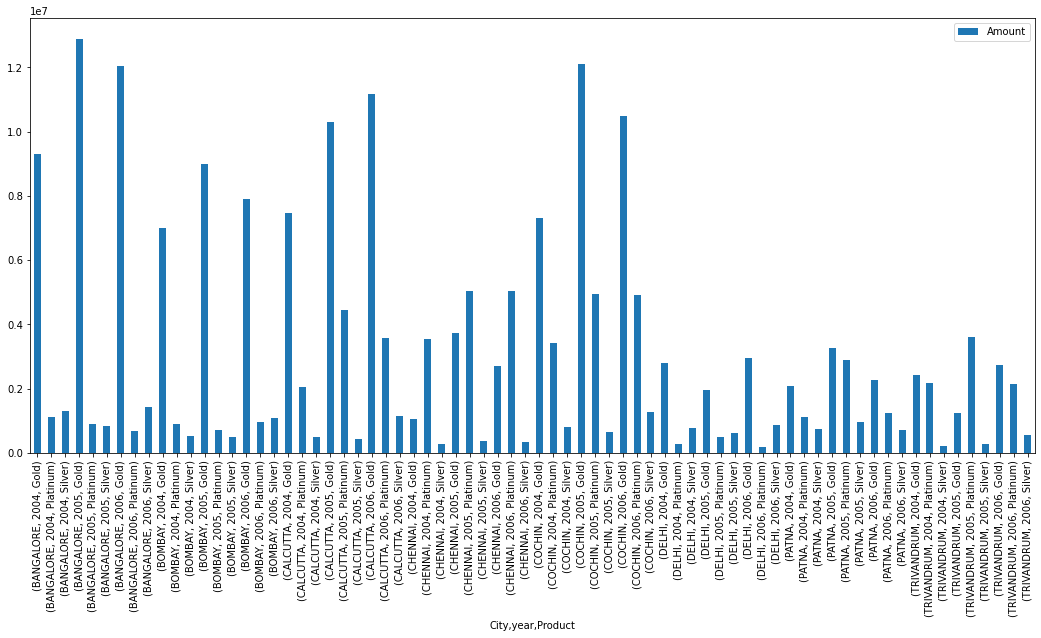

In [64]:
prod_spend1.plot(kind='bar',figsize=(18,8))


In [65]:
#3 city wise spend on each product on yearly basis
# Method 2
prod_spend = pd.pivot_table(data=cust_spend,index=['City','year'],columns='Product',values='Amount',aggfunc=sum)

<AxesSubplot:xlabel='City,year'>

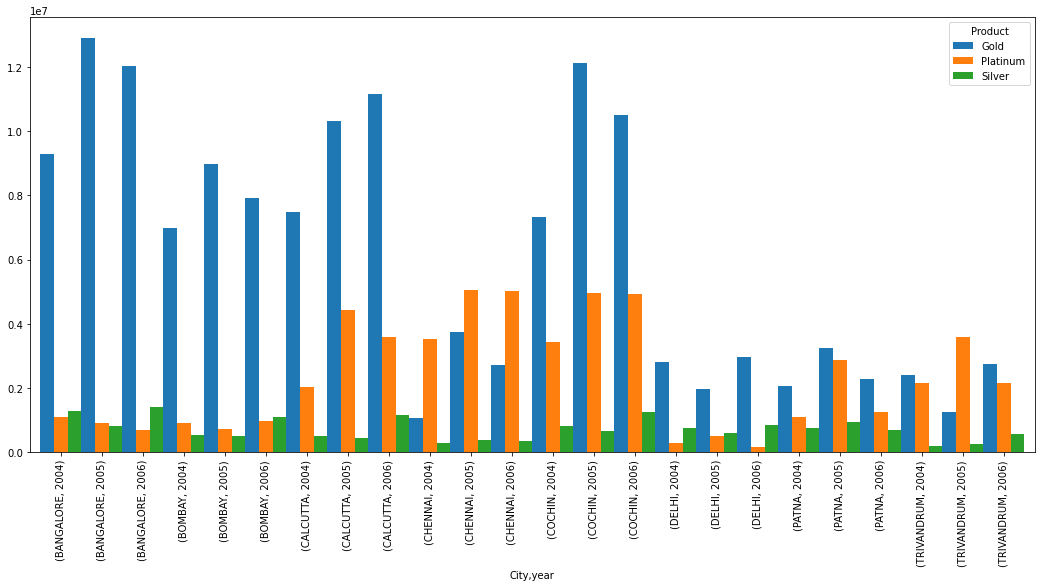

In [66]:
prod_spend.plot(kind='bar',figsize=(18,8),width=1)

In [67]:
month_comp_spend = pd.pivot_table(data=cust_spend,index='City',columns='only_month',values='Amount',aggfunc=sum)

In [68]:
month_comp_spend

only_month,1,2,3,4,5,6,7,8,9,10,11,12
City,,,,,,,,,,,,
BANGALORE,9041796.84,6734494.76,5362903.07,4207980.48,6383115.13,1330685.90,2228217.69,695061.95,703018.28,1091602.61,2260603.07,422167.24
BOMBAY,5948993.33,4276988.30,5227850.50,1873785.01,3891945.60,1172594.97,177726.32,1066744.75,1278402.79,676005.70,2872049.40,140040.71
CALCUTTA,9064864.90,8150545.61,4939040.04,3457507.95,5578246.87,2293045.81,2234573.27,1548354.02,1511713.57,196357.83,2078880.93,55001.50
CHENNAI,4466961.36,4385815.95,3183643.71,2518656.99,2856199.62,1244242.16,693825.77,305875.97,745759.40,156247.17,1347779.28,223628.27
COCHIN,11714373.54,5747886.38,5645146.53,3882744.94,6581085.69,2495745.07,1290897.30,2317306.61,1382242.90,868551.89,3127999.60,909533.05
DELHI,2714261.45,1494064.06,2267149.02,777240.75,1600322.07,511276.09,50001.50,155402.16,50001.00,64615.46,391610.96,842342.02
PATNA,4916205.55,2353333.55,1437166.61,2338179.53,2136586.80,746186.13,50000.00,419383.64,70329.95,329537.34,413677.87,50000.00
TRIVANDRUM,3704336.99,2857123.89,2392316.51,1199293.45,2813534.48,400336.83,260484.50,453773.94,186063.70,285581.92,143387.40,640922.26


<AxesSubplot:xlabel='City'>

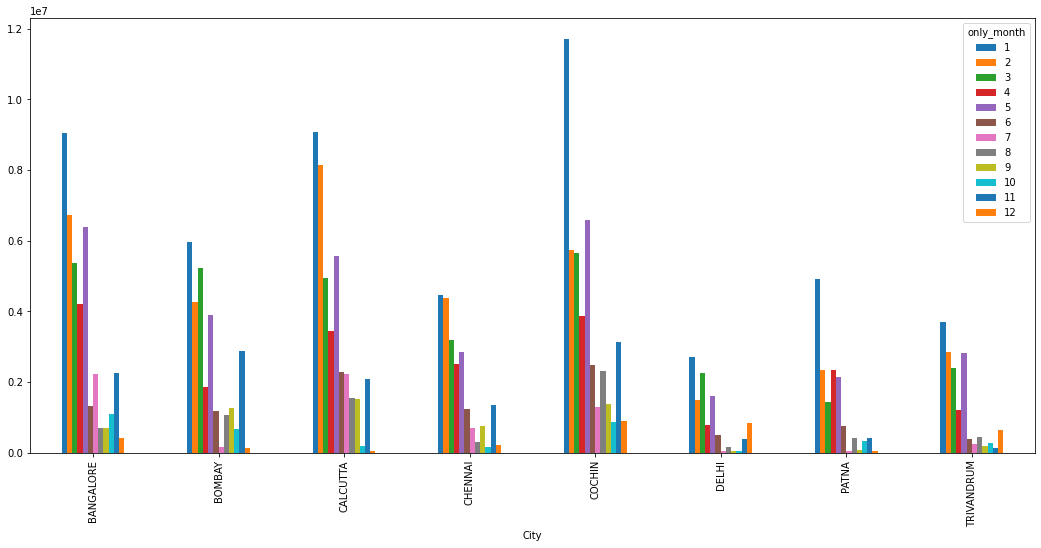

In [69]:
#4(a)  Monthly comparison of total spends, city wise
month_comp_spend.plot(kind='bar',figsize=(18,8))

In [70]:
type_spend = cust_spend[['year','Type','Amount']].groupby(['year','Type']).sum().reset_index()

In [71]:
AIR_TICKETS_SPEND = type_spend[type_spend['Type']=='AIR TICKET']

In [72]:
AIR_TICKETS_SPEND

,year,Type,Amount
0,2004,AIR TICKET,4357225.35
15,2005,AIR TICKET,10550152.21
30,2006,AIR TICKET,5248469.56


Text(0, 0.5, 'Amount')

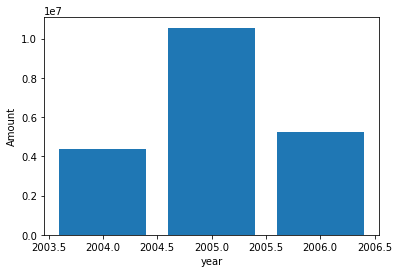

In [73]:
#(b) Comparison of yearly spend on air tickets
plt.bar(AIR_TICKETS_SPEND['year'],height=AIR_TICKETS_SPEND['Amount'])
plt.xlabel('year')
plt.ylabel('Amount')

In [74]:
#monthly_prod_spend1 = cust_spend[['only_month','Product','Amount']].groupby(['only_month','Product']).sum()

In [75]:
monthly_prod_spend = pd.pivot_table(data=cust_spend,index='Product',columns='only_month',values='Amount',aggfunc=sum)

<AxesSubplot:xlabel='Product'>

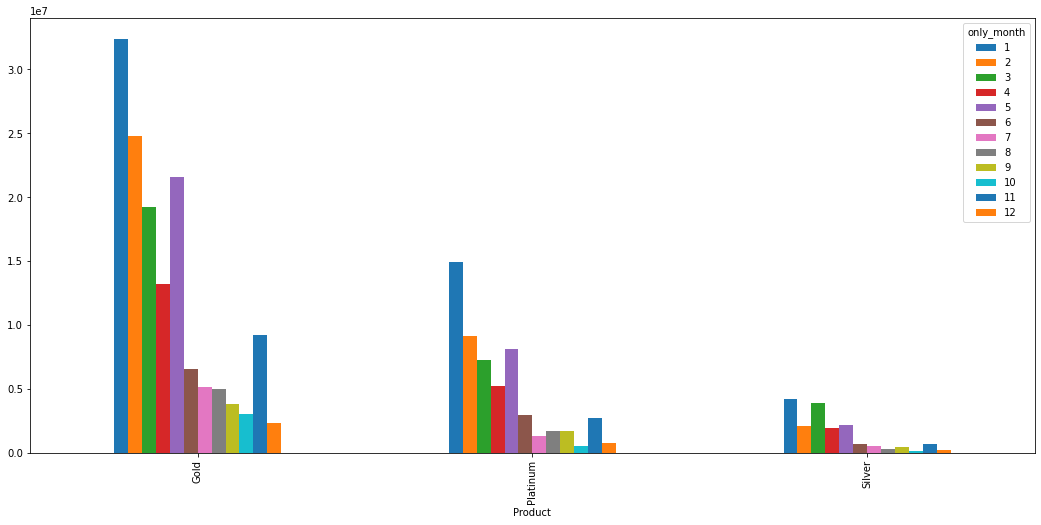

In [76]:
#(c) Comparison of monthly spend for each product
monthly_prod_spend.plot(kind='bar',figsize=(18,8))

In [ ]:
# In the January month,the spend is high for each product 

In [77]:
data = pd.pivot_table(data=cust_repayment,index=['Product','City','Customer'],columns='only_month',values='Amount',aggfunc='sum')

In [78]:
data = pd.pivot_table(data=cust_repayment,index=['Product','City','Customer'],columns='year',values='Amount',aggfunc='sum')

In [79]:
result = data.loc[('Gold'),:]

In [80]:
result = data.loc[('Silver'),:]

In [81]:
result = data.loc[('Platinum'),:]

In [82]:
def Top_Cust(Product,time):
    data_month = pd.pivot_table(data=cust_repayment,index=['Product','City','Customer'],columns='only_month',values='Amount',aggfunc='sum')
    data_year = pd.pivot_table(data=cust_repayment,index=['Product','City','Customer'],columns='year',values='Amount',aggfunc='sum')
    
    if Product=='gold' and time=='month':
        result = data_month.loc[('Gold'),:]
        
    elif Product=='gold' and time=='year':
        result = data_year.loc[('Gold'),:]
        
    elif Product=='silver' and time=='month':
        result = data_month.loc[('Silver'),:]
        
    elif Product=='silver' and time=='year':
        result = data_year.loc[('Silver'),:]
        
    if Product=='platinum' and time=='month':
        result = data_month.loc[('Platinum'),:]
        
    elif Product=='platinum' and time=='year':
        result = data_year.loc[('Platinum'),:]
    return result

        

In [83]:
Top_Cust('gold','month')

only_month                   1           2           3           4   \
City       Customer                                                   
BANGALORE  A1        2407806.29   781873.80         NaN   508949.16   
           A13       2014186.98  2049808.15  1183569.05   494392.40   
           A14        993114.87  1482923.34  1682886.51   812582.20   
           A30        608066.49  1321469.80   599331.38   425694.16   
           A43       1978038.15   763846.93  1378774.72   612541.80   
           A63        372179.26         NaN         NaN         NaN   
           A81              NaN         NaN   207780.32         NaN   
           A88              NaN         NaN   146821.30         NaN   
           A92              NaN         NaN         NaN   459105.69   
BOMBAY     A12       1220387.18  1978117.59  1001134.17   601326.07   
           A17        761645.74   374865.01  2007441.50   391463.29   
           A42       2516249.24   476213.23   579721.80   173199.87   
           A62        996722.42   478764.07   546251.18  1115760.01   
           A91              NaN         NaN         NaN   247781.00   
CALCUTTA   A10       1091589.54   652033.51   720391.63   478747.41   
           A15       1051502.61   516544.51  1738696.08         NaN   
           A29       1474900.52   627147.67  1269579.93         NaN   
           A31              NaN   962656.24   845269.25    13054.67   
           A60       2465584.81  1403731.08   109367.55  2397565.91   
           A89              NaN         NaN         NaN   497237.97   
CHENNAI    A27       1215350.93   841114.02   976107.81   379529.81   
           A67         67845.60         NaN         NaN         NaN   
COCHIN     A11        958556.39  1069789.26   508638.02   958466.08   
           A16       1071852.72   331143.85   886861.02   338710.86   
           A32              NaN   851127.91   540858.16   333042.82   
           A45       2033076.43  1241580.90   869686.35  1435443.21   
           A61       1755251.93  1345911.54   382632.66  3412860.60   
           A65        468922.60         NaN         NaN         NaN   
           A90              NaN         NaN         NaN   109931.32   
           A94        153465.89         NaN         NaN         NaN   
DELHI      A44       2415712.91   745752.19   696222.43   346650.76   
           A64              NaN         NaN         NaN         NaN   
           A82              NaN         NaN   342200.74         NaN   
           A93        342326.14         NaN         NaN         NaN   
PATNA      A26       1129827.37  1298000.32   416810.29   558432.60   
           A66        477039.78         NaN         NaN         NaN   
           A95        369405.96         NaN         NaN         NaN   
TRIVANDRUM A28       1034461.46   968709.79  1547067.86   115326.71   

only_month                   5          6           7          8          9   \
City       Customer                                                            
BANGALORE  A1               NaN        NaN   297176.74        NaN  186427.50   
           A13        632600.75  837101.91   424603.55  873304.51  439840.91   
           A14       1418286.63   41128.98    41962.19  198623.13  462300.80   
           A30       3086549.14   72609.24         NaN        NaN   19761.75   
           A43       2058983.99   23525.91   803935.53        NaN        NaN   
           A63        416676.34        NaN         NaN        NaN        NaN   
           A81              NaN        NaN         NaN        NaN        NaN   
           A88              NaN        NaN         NaN        NaN        NaN   
           A92              NaN        NaN         NaN        NaN        NaN   
BOMBAY     A12       1048233.62  526225.82  1201928.94  120471.17  289407.01   
           A17        382881.69  257937.78   118112.45   98341.04        NaN   
           A42       3305341.39        NaN         NaN        NaN    3937.81   
           A62        758067.14        